In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '7B'

In [3]:
algorithm_name = 'tfidf'

In [4]:
profile_ids = [783214, 19568591, 25073877, 103018203, 256881576, 810619093749559296]

In [5]:
labels = list('ABCDEF')

# Time Frame October and November 2017

# Target Classification

### Target Classification Training

In [6]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_training'
)

In [7]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_testing_over_time',
    time_frame='oct_nov'
)

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

In [9]:
corpus = [
    *target_training_dataset.X, 
    *target_testing_dataset.X
]

In [10]:
X = vectorizer.fit_transform(corpus)

In [11]:
svm_target_classification = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [12]:
svm_target_classification.fit(
    X[:len(target_training_dataset.X)],
    target_training_dataset.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Target Classification Prediction

In [13]:
target_predictions = svm_target_classification.predict(X[len(target_training_dataset.X):])

In [14]:
predicted_tweets_and_ids_objectification_of_women = []
predicted_tweets_and_ids_gender_equality = []
predicted_tweets_and_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [15]:
for label, tweet, id in list(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_tweets_and_ids_objectification_of_women.append((tweet, id))
    elif label == 1:
        predicted_tweets_and_ids_gender_equality.append((tweet, id))
    elif label == 2:
        predicted_tweets_and_ids_conservatism.append((tweet, id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

### Stance Classification Training - Objectification of Women

In [16]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Objectification of Women'
)

In [17]:
predicted_tweets_objectification_of_women = [
    tweet for tweet, _ in predicted_tweets_and_ids_objectification_of_women
]

In [18]:
corpus_objectification_of_women = [
    *stance_training_dataset_objectification_of_women.X,
    *predicted_tweets_objectification_of_women
]

In [19]:
X = vectorizer.fit_transform(corpus_objectification_of_women)

In [20]:
svm_objectification_of_women = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [21]:
svm_objectification_of_women.fit(
    X[:len(stance_training_dataset_objectification_of_women.X)],
    stance_training_dataset_objectification_of_women.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Objectification of Women

In [22]:
predictions_objectification_of_women = svm_objectification_of_women.predict(
    X[len(stance_training_dataset_objectification_of_women.X):]
)

In [23]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_tweets_and_ids_objectification_of_women
        ]
    )
)

In [24]:
stances_objectification_of_women = {}

In [25]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [26]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

### Stance Classification Training - Gender Equality

In [27]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Gender Equality'
)

In [28]:
predicted_tweets_gender_equality = [
    tweet for tweet, _ in predicted_tweets_and_ids_gender_equality
]

In [29]:
corpus_gender_equality = [
    *stance_training_dataset_gender_equality.X,
    *predicted_tweets_gender_equality
]

In [30]:
X = vectorizer.fit_transform(corpus_gender_equality)

In [31]:
svm_gender_equality = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [32]:
svm_gender_equality.fit(
    X[:len(stance_training_dataset_gender_equality.X)],
    stance_training_dataset_gender_equality.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Gender Equality

In [33]:
predictions_gender_equality = svm_gender_equality.predict(
    X[len(stance_training_dataset_gender_equality.X):]
)

In [34]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_tweets_and_ids_gender_equality
        ]
    )
)

In [35]:
stances_gender_equality = {}

In [36]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [37]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

### Stance Classification Training - Conservatism

In [38]:
stance_training_dataset_conservatism = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Conservatism'
)

In [39]:
predicted_tweets_conservatism = [
    tweet for tweet, _ in predicted_tweets_and_ids_conservatism
]

In [40]:
corpus_conservatism = [
    *stance_training_dataset_conservatism.X,
    *predicted_tweets_conservatism
]

In [41]:
X = vectorizer.fit_transform(corpus_conservatism)

In [42]:
svm_conservatism = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [43]:
svm_conservatism.fit(
    X[:len(stance_training_dataset_conservatism.X)],
    stance_training_dataset_conservatism.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Conservatism

In [44]:
predictions_conservatism = svm_conservatism.predict(
    X[len(stance_training_dataset_conservatism.X):]
)

In [45]:
predictions_and_ids_conservatism = list(
    zip(
        predictions_conservatism,
        [
            idx for _, idx in predicted_tweets_and_ids_conservatism
        ]
    )
)

In [46]:
stances_conservatism = {}

In [47]:
sorted_predictions_and_ids_conservatism = sorted(
    predictions_and_ids_conservatism,
    key=operator.itemgetter(1)
)

In [48]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_conservatism, operator.itemgetter(1)):
    stances_conservatism[user_id] = np.mean([stance for stance, _ in list(g)])

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [49]:
profile_vectors_oct_nov = {
    user_id: np.array(
        [[
            stances_objectification_of_women.get(user_id, 1.0),
            stances_gender_equality.get(user_id, 1.0),
            stances_conservatism.get(user_id, 1.0)
        ]]
    )
    
    for user_id in profile_ids
}

# Time Frame December and January 2017/2018

# Target Classification

### Target Classification Training

In [50]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_training'
)

In [51]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_testing_over_time',
    time_frame='dec_jan'
)

In [52]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

In [53]:
corpus = [
    *target_training_dataset.X, 
    *target_testing_dataset.X
]

In [54]:
X = vectorizer.fit_transform(corpus)

In [55]:
svm_target_classification = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [56]:
svm_target_classification.fit(
    X[:len(target_training_dataset.X)],
    target_training_dataset.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Target Classification Prediction

In [57]:
target_predictions = svm_target_classification.predict(X[len(target_training_dataset.X):])

In [58]:
predicted_tweets_and_ids_objectification_of_women = []
predicted_tweets_and_ids_gender_equality = []
predicted_tweets_and_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [59]:
for label, tweet, id in list(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_tweets_and_ids_objectification_of_women.append((tweet, id))
    elif label == 1:
        predicted_tweets_and_ids_gender_equality.append((tweet, id))
    elif label == 2:
        predicted_tweets_and_ids_conservatism.append((tweet, id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

### Stance Classification Training - Objectification of Women

In [60]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Objectification of Women'
)

In [61]:
predicted_tweets_objectification_of_women = [
    tweet for tweet, _ in predicted_tweets_and_ids_objectification_of_women
]

In [62]:
corpus_objectification_of_women = [
    *stance_training_dataset_objectification_of_women.X,
    *predicted_tweets_objectification_of_women
]

In [63]:
X = vectorizer.fit_transform(corpus_objectification_of_women)

In [64]:
svm_objectification_of_women = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [65]:
svm_objectification_of_women.fit(
    X[:len(stance_training_dataset_objectification_of_women.X)],
    stance_training_dataset_objectification_of_women.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Objectification of Women

In [66]:
predictions_objectification_of_women = svm_objectification_of_women.predict(
    X[len(stance_training_dataset_objectification_of_women.X):]
)

In [67]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_tweets_and_ids_objectification_of_women
        ]
    )
)

In [68]:
stances_objectification_of_women = {}

In [69]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [70]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

### Stance Classification Training - Gender Equality

In [71]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Gender Equality'
)

In [72]:
predicted_tweets_gender_equality = [
    tweet for tweet, _ in predicted_tweets_and_ids_gender_equality
]

In [73]:
corpus_gender_equality = [
    *stance_training_dataset_gender_equality.X,
    *predicted_tweets_gender_equality
]

In [74]:
X = vectorizer.fit_transform(corpus_gender_equality)

In [75]:
svm_gender_equality = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [76]:
svm_gender_equality.fit(
    X[:len(stance_training_dataset_gender_equality.X)],
    stance_training_dataset_gender_equality.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Gender Equality

In [77]:
predictions_gender_equality = svm_gender_equality.predict(
    X[len(stance_training_dataset_gender_equality.X):]
)

In [78]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_tweets_and_ids_gender_equality
        ]
    )
)

In [79]:
stances_gender_equality = {}

In [80]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [81]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

### Stance Classification Training - Conservatism

In [82]:
stance_training_dataset_conservatism = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Conservatism'
)

In [83]:
predicted_tweets_conservatism = [
    tweet for tweet, _ in predicted_tweets_and_ids_conservatism
]

In [84]:
corpus_conservatism = [
    *stance_training_dataset_conservatism.X,
    *predicted_tweets_conservatism
]

In [85]:
X = vectorizer.fit_transform(corpus_conservatism)

In [86]:
svm_conservatism = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [87]:
svm_conservatism.fit(
    X[:len(stance_training_dataset_conservatism.X)],
    stance_training_dataset_conservatism.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Conservatism

In [88]:
predictions_conservatism = svm_conservatism.predict(
    X[len(stance_training_dataset_conservatism.X):]
)

In [89]:
predictions_and_ids_conservatism = list(
    zip(
        predictions_conservatism,
        [
            idx for _, idx in predicted_tweets_and_ids_conservatism
        ]
    )
)

In [90]:
stances_conservatism = {}

In [91]:
sorted_predictions_and_ids_conservatism = sorted(
    predictions_and_ids_conservatism,
    key=operator.itemgetter(1)
)

In [92]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_conservatism, operator.itemgetter(1)):
    stances_conservatism[user_id] = np.mean([stance for stance, _ in list(g)])

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [93]:
profile_vectors_dec_jan = {
    user_id: np.array(
        [[
            stances_objectification_of_women.get(user_id, 1.0),
            stances_gender_equality.get(user_id, 1.0),
            stances_conservatism.get(user_id, 1.0)
        ]]
    )
    
    for user_id in profile_ids
}

# Time Frame February and March 2018

# Target Classification

### Target Classification Training

In [94]:
target_training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_training'
)

In [95]:
target_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='target_testing_over_time',
    time_frame='feb_mar'
)

In [96]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

In [97]:
corpus = [
    *target_training_dataset.X, 
    *target_testing_dataset.X
]

In [98]:
X = vectorizer.fit_transform(corpus)

In [99]:
svm_target_classification = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [100]:
svm_target_classification.fit(
    X[:len(target_training_dataset.X)],
    target_training_dataset.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Target Classification Prediction

In [101]:
target_predictions = svm_target_classification.predict(X[len(target_training_dataset.X):])

In [102]:
predicted_tweets_and_ids_objectification_of_women = []
predicted_tweets_and_ids_gender_equality = []
predicted_tweets_and_ids_conservatism = []

Creating lists of Tweets, one for each target.

In [103]:
for label, tweet, id in list(zip(target_predictions, target_testing_dataset.X, target_testing_dataset.id)):
    if label == 0:
        predicted_tweets_and_ids_objectification_of_women.append((tweet, id))
    elif label == 1:
        predicted_tweets_and_ids_gender_equality.append((tweet, id))
    elif label == 2:
        predicted_tweets_and_ids_conservatism.append((tweet, id))
    else:
        raise ValueError(f"Unsupported label: {label}")

# Stance Classification - Objectification of Women

### Stance Classification Training - Objectification of Women

In [104]:
stance_training_dataset_objectification_of_women = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Objectification of Women'
)

In [105]:
predicted_tweets_objectification_of_women = [
    tweet for tweet, _ in predicted_tweets_and_ids_objectification_of_women
]

In [106]:
corpus_objectification_of_women = [
    *stance_training_dataset_objectification_of_women.X,
    *predicted_tweets_objectification_of_women
]

In [107]:
X = vectorizer.fit_transform(corpus_objectification_of_women)

In [108]:
svm_objectification_of_women = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [109]:
svm_objectification_of_women.fit(
    X[:len(stance_training_dataset_objectification_of_women.X)],
    stance_training_dataset_objectification_of_women.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Objectification of Women

In [110]:
predictions_objectification_of_women = svm_objectification_of_women.predict(
    X[len(stance_training_dataset_objectification_of_women.X):]
)

In [111]:
predictions_and_ids_objectification_of_women = list(
    zip(
        predictions_objectification_of_women,
        [
            idx for _, idx in predicted_tweets_and_ids_objectification_of_women
        ]
    )
)

In [112]:
stances_objectification_of_women = {}

In [113]:
sorted_predictions_and_ids_objectification_of_women = sorted(
    predictions_and_ids_objectification_of_women,
    key=operator.itemgetter(1)
)

In [114]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_objectification_of_women, operator.itemgetter(1)):
    stances_objectification_of_women[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Gender Equality

### Stance Classification Training - Gender Equality

In [115]:
stance_training_dataset_gender_equality = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Gender Equality'
)

In [116]:
predicted_tweets_gender_equality = [
    tweet for tweet, _ in predicted_tweets_and_ids_gender_equality
]

In [117]:
corpus_gender_equality = [
    *stance_training_dataset_gender_equality.X,
    *predicted_tweets_gender_equality
]

In [118]:
X = vectorizer.fit_transform(corpus_gender_equality)

In [119]:
svm_gender_equality = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [120]:
svm_gender_equality.fit(
    X[:len(stance_training_dataset_gender_equality.X)],
    stance_training_dataset_gender_equality.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Gender Equality

In [121]:
predictions_gender_equality = svm_gender_equality.predict(
    X[len(stance_training_dataset_gender_equality.X):]
)

In [122]:
predictions_and_ids_gender_equality = list(
    zip(
        predictions_gender_equality,
        [
            idx for _, idx in predicted_tweets_and_ids_gender_equality
        ]
    )
)

In [123]:
stances_gender_equality = {}

In [124]:
sorted_predictions_and_ids_gender_equality = sorted(
    predictions_and_ids_gender_equality,
    key=operator.itemgetter(1)
)

In [125]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_gender_equality, operator.itemgetter(1)):
    stances_gender_equality[user_id] = np.mean([stance for stance, _ in list(g)])

# Stance Classification - Conservatism

### Stance Classification Training - Conservatism

In [126]:
stance_training_dataset_conservatism = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='bag_of_words',
    task='stance_training',
    target='Conservatism'
)

In [127]:
predicted_tweets_conservatism = [
    tweet for tweet, _ in predicted_tweets_and_ids_conservatism
]

In [128]:
corpus_conservatism = [
    *stance_training_dataset_conservatism.X,
    *predicted_tweets_conservatism
]

In [129]:
X = vectorizer.fit_transform(corpus_conservatism)

In [130]:
svm_conservatism = LinearSVC(
    max_iter=100000, 
    verbose=1
)

In [131]:
svm_conservatism.fit(
    X[:len(stance_training_dataset_conservatism.X)],
    stance_training_dataset_conservatism.y
)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)

### Stance Classification Prediction - Conservatism

In [132]:
predictions_conservatism = svm_conservatism.predict(
    X[len(stance_training_dataset_conservatism.X):]
)

In [133]:
predictions_and_ids_conservatism = list(
    zip(
        predictions_conservatism,
        [
            idx for _, idx in predicted_tweets_and_ids_conservatism
        ]
    )
)

In [134]:
stances_conservatism = {}

In [135]:
sorted_predictions_and_ids_conservatism = sorted(
    predictions_and_ids_conservatism,
    key=operator.itemgetter(1)
)

In [136]:
for user_id, g in itertools.groupby(sorted_predictions_and_ids_conservatism, operator.itemgetter(1)):
    stances_conservatism[user_id] = np.mean([stance for stance, _ in list(g)])

# Profile Vectors

Based on fields `Objectification of Women`, `Gender Equality`, and `Conservatism`.

In [137]:
profile_vectors_feb_mar = {
    user_id: np.array(
        [[
            stances_objectification_of_women.get(user_id, 1.0),
            stances_gender_equality.get(user_id, 1.0),
            stances_conservatism.get(user_id, 1.0)
        ]]
    )
    
    for user_id in profile_ids
}

# Evaluation

In [138]:
metoo_vector = np.array([[0, 2, 0]])

In [139]:
profile_vectors = {
    user_id: {
        'Objectification of Women': [
            profile_vectors_oct_nov[user_id][0][0],
            profile_vectors_dec_jan[user_id][0][0],
            profile_vectors_feb_mar[user_id][0][0]
        ],
        'Gender Equality': [
            profile_vectors_oct_nov[user_id][0][1],
            profile_vectors_dec_jan[user_id][0][1],
            profile_vectors_feb_mar[user_id][0][1]
        ],
        'Conservatism': [
            profile_vectors_oct_nov[user_id][0][2],
            profile_vectors_dec_jan[user_id][0][2],
            profile_vectors_feb_mar[user_id][0][2]
        ]
    }
    
    
    for user_id in profile_ids
}

In [140]:
df_objectification_of_women = pd.DataFrame.from_dict(
    {
        user_id: profile_vectors[user_id]['Objectification of Women'] 
        for user_id in profile_ids
    },
    orient='index'
).applymap(lambda x: x - 1.0)

df_objectification_of_women.rename({0: 'Oct/Nov', 1: 'Dec/Jan', 2: 'Feb/Mar'}, axis='columns', inplace=True)

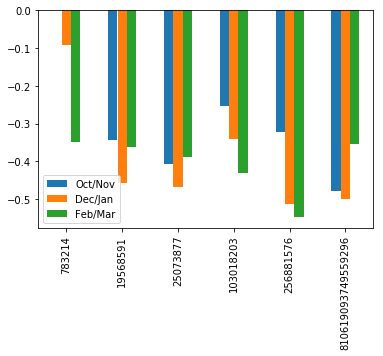

In [141]:
df_objectification_of_women.plot(kind='bar')

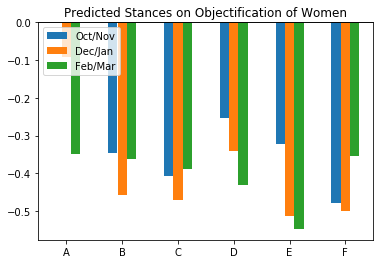

In [142]:
df_objectification_of_women.plot(kind='bar', title=f'Predicted Stances on Objectification of Women', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_objectification_of_women.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [143]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_objectification_of_women.tex', 'w', encoding='utf-8') as f:
    df_objectification_of_women.to_latex(f)

In [144]:
df_gender_equality = pd.DataFrame.from_dict(
    {
        user_id: profile_vectors[user_id]['Gender Equality'] 
        for user_id in profile_ids
    },
    orient='index'
).applymap(lambda x: x - 1)

df_gender_equality.rename({0: 'Oct/Nov', 1: 'Dec/Jan', 2: 'Feb/Mar'}, axis='columns', inplace=True)

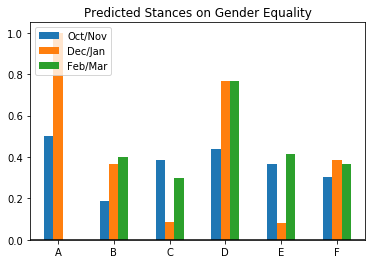

In [145]:
df_gender_equality.plot(kind='bar', title=f'Predicted Stances on Gender Equality', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)

plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_gender_equality.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [146]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_gender_equality.tex', 'w', encoding='utf-8') as f:
    df_gender_equality.to_latex(f)

In [147]:
df_conservatism = pd.DataFrame.from_dict(
    {
        user_id: profile_vectors[user_id]['Conservatism'] 
        for user_id in profile_ids
    }, 
    orient='index'
).applymap(lambda x: x - 1)

df_conservatism.rename({0: 'Oct/Nov', 1: 'Dec/Jan', 2: 'Feb/Mar'}, axis='columns', inplace=True)

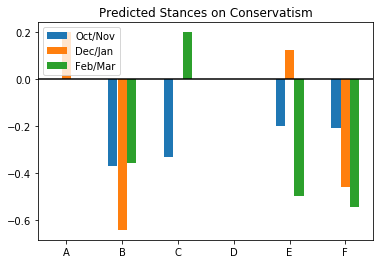

In [148]:
df_conservatism.plot(kind='bar', title=f'Predicted Stances on Conservatism', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xticks(np.arange(len(labels)), labels)

plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}_conservatism.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [149]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_conservatism.tex', 'w', encoding='utf-8') as f:
    df_conservatism.to_latex(f)